In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df1 = pd.read_csv("C:/Users/athar/OneDrive/Desktop/jupyter/bengaluru_house_prices.csv")

df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
#lets know the areatype feature 
'''df1: This is the DataFrame that you are working with. It contains your data.

.groupby('area_type'): This method is used to group the DataFrame df1 by the column named 'area_type'. The groupby method splits the DataFrame into groups based on unique values in the 'area_type' column.

['area_type']: After grouping by 'area_type', this part specifies that we are interested in the 'area_type' column within each group. It essentially selects the 'area_type' column from each group.

.agg('count'): The agg method is used to apply an aggregation function to each group. In this case, 'count' is the aggregation function. It counts the number of non-NA/null entries in the 'area_type' column for each group.'''
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [6]:
#removing the unwanted columns
df1.drop(['area_type','availability','balcony','society'],axis=1,inplace=True)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
#handling the null values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# as there are total 13k entries and null vaues are less so we can easily dropp them
df1.dropna(inplace=True)
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
#size ko dekhte hai
df1['size'].unique()
#here 4 bhk and 4 bedroom are same and hence we need to handle this properly 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df1['bhk']=df1['size'].apply(lambda x : int(x.split(' ')[0]))
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df1[df1.bhk>20].head(10)
#this give an problem for 43 bedroom to have 2400 area of size we need to tackle this

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
df1['total_sqft'].unique()
#here the dtype is also object lets try to convetrt it into float


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x) :
    try :
        float(x)
    except :
        return False
    return True


In [14]:
df1[~df1['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
#in the total_sqft column the units are not accordingly so we need to handle them also
def convert_sqft_to_num(x) :
    tokens=x.split('-')
    if len(tokens)==2 :
        return (float(tokens[0])+float(tokens[1]))/2
    try :
         return float(x)
    except:
        return None

In [16]:
df1['total_sqft']=df1['total_sqft'].apply(convert_sqft_to_num)

In [17]:
df1.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [18]:
#lets anylyse some ocation satas
m=len(df1['location'].unique())
m
#this is a huge number

1304

In [19]:
location_stats=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats
#lets do some manipulation on location which have less then 10 data points

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [20]:
location_stats_below_10=location_stats[location_stats<=10]
location_stats_below_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [21]:
len(location_stats_below_10)

1063

In [22]:
df1['location']=df1['location'].apply(lambda x : 'other' if x in location_stats_below_10 else x)
len(df1['location'].unique())

242

In [23]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
#in this creationg an prize_per area column is very important
df1['price_per_totalsqft']=(df1['price']*100000/df1['total_sqft'])
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_totalsqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In machine learning, outliers are data points that significantly deviate from the other observations in a dataset. They can represent anomalies, noise, or errors and can affect the performance of models, especially those sensitive to the distribution of data. Understanding and handling outliers is crucial for building robust models. Here’s a detailed explanation of outliers:

Characteristics of Outliers
Deviation from Mean/Median: Outliers are far removed from the central tendency (mean or median) of the data.
High Variance: They often have values that are unusually high or low compared to the majority of the data.
Low Probability: Outliers are rare and have a low probability of occurrence.
Causes of Outliers
Measurement Errors: Incorrect data entry or sensor malfunctions.
Experimental Errors: Errors during data collection or experiment design.
Natural Variability: True natural variability in the data.
Fraud or Malicious Activity: In cases like financial transactions or network security.
Identification of Outliers
Statistical Methods:

Z-Score: Data points with a Z-score greater than a certain threshold (e.g., 3 or -3) are considered outliers.
Interquartile Range (IQR): Data points that fall below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers.
python
Copy code
# Example of IQR method
Q1 = df['column'].quantile(0.25)
Q3 = df['column'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['column'] < lower_bound) | (df['column'] > upper_bound)]
Visual Methods:

Box Plots: Visual representation showing quartiles and potential outliers.
Scatter Plots: Useful for identifying outliers in two-dimensional data.
Histograms: Can reveal the distribution and highlight outliers.
Machine Learning Methods:

Isolation Forest: Anomaly detection algorithm that isolates observations by randomly selecting a feature and then randomly selecting a split value.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise): A clustering algorithm that can identify outliers as points that do not belong to any cluster.
python
Copy code
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(df[['column']])
Handling Outliers
Removal: Simply remove outliers if they are deemed to be erroneous or not representative of the data.
Transformation: Apply transformations (e.g., log, square root) to reduce the impact of outliers.
Imputation: Replace outliers with a measure of central tendency (mean, median) or other suitable value.
Robust Models: Use models less sensitive to outliers, such as tree-based algorithms (e.g., Random Forest) instead of linear models.
Separate Analysis: Sometimes, outliers themselves carry important information (e.g., fraud detection) and should be analyzed separately.
Importance in Machine Learning
Model Accuracy: Outliers can skew the results and degrade the accuracy of the model.
Parameter Estimates: In models like linear regression, outliers can heavily influence the parameter estimates.
Performance Metrics: Outliers can affect performance metrics like mean squared error (MSE) and R-squared.
In summary, outliers are critical to identify and handle appropriately in machine learning to ensure the development of accurate, robust, and reliable models. Depending on the context, they might be treated differently, but the fundamental goal is to mitigate their adverse effects on the analysis.

In [25]:
#working on the outliers is a=very important as it may give problem to our model perfromance
df2=df1[~(df1['total_sqft']/df1['bhk']<=300)]#here ber room sqft is taken into consideration 
df2.shape

(12320, 7)

In [26]:
df2.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_totalsqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889


In [27]:
df2['price_per_totalsqft'].describe()
#here the maximum is too high we need to remove it

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_totalsqft, dtype: float64

In [28]:
def remove_ppts_outlier(df) :
    df_out=pd.DataFrame()
    for key,subdf in df2.groupby('location'):
        m=np.mean(subdf.price_per_totalsqft)
        st=np.std(subdf.price_per_totalsqft)
        reduced_df=subdf[(subdf.price_per_totalsqft>(m-st)) & (subdf.price_per_totalsqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out 
df3=remove_ppts_outlier(df2)
df3.shape

(10016, 7)

In [29]:
df3.shape

(10016, 7)

In [30]:
#accordinglye throghout the analysis it has been found that 2 bhk house with same sq foot are costs more than 3 bhk houses with same sq ft area this is an outlier so lets modify it
def plot_function(df,location) :
    bh2=df[(df['location']==location) & (df['bhk']==2)]
    bh3=df[(df['location']==location) & (df['bhk']==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bh2.total_sqft,bh2.price,color='green',label='2 bhk')
    plt.scatter(bh3.total_sqft,bh3.price,color='blue',label='3 bhk',marker='+')
    plt.xlabel('total sq feet area')
    plt.ylabel('price')
    plt.legend()
    
    

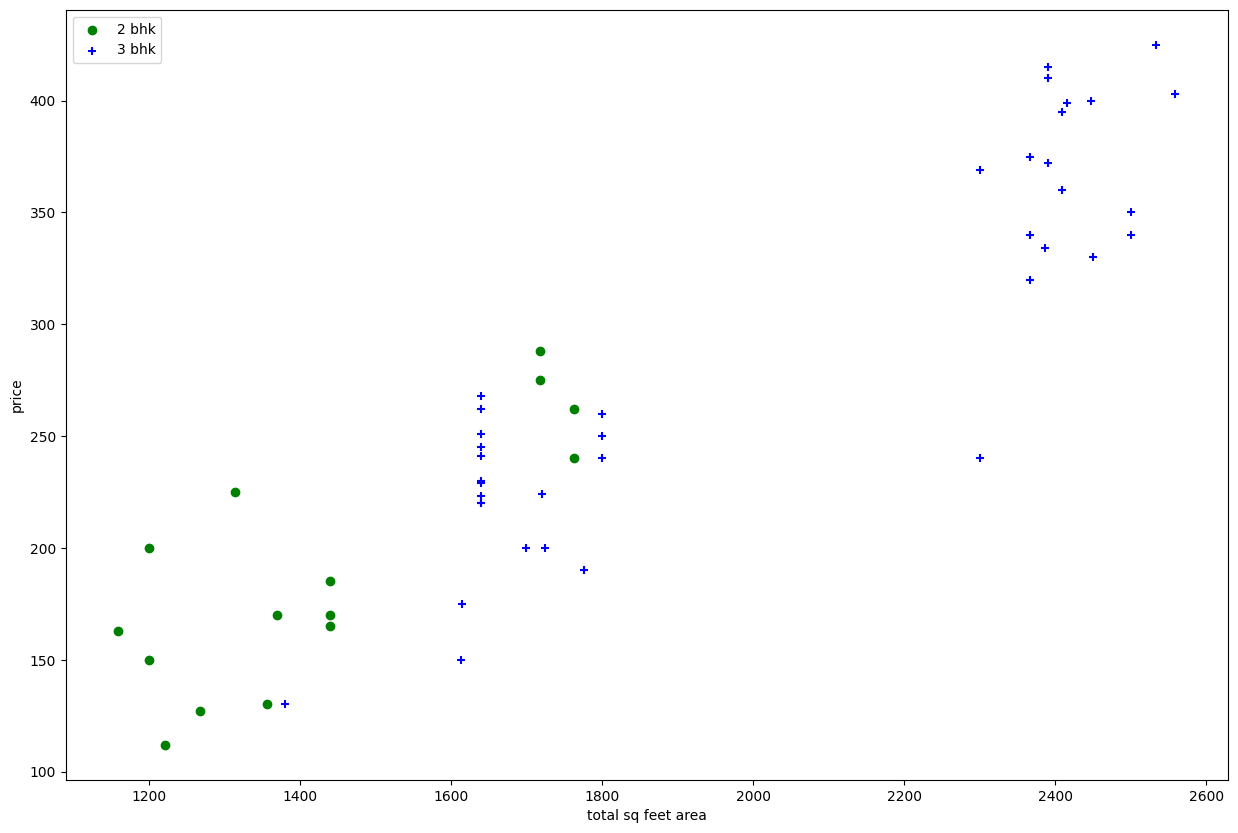

In [31]:
plot_function(df3,'Rajaji Nagar')

In [32]:
#Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_totalsqft),
                'std': np.std(bhk_df.price_per_totalsqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_totalsqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

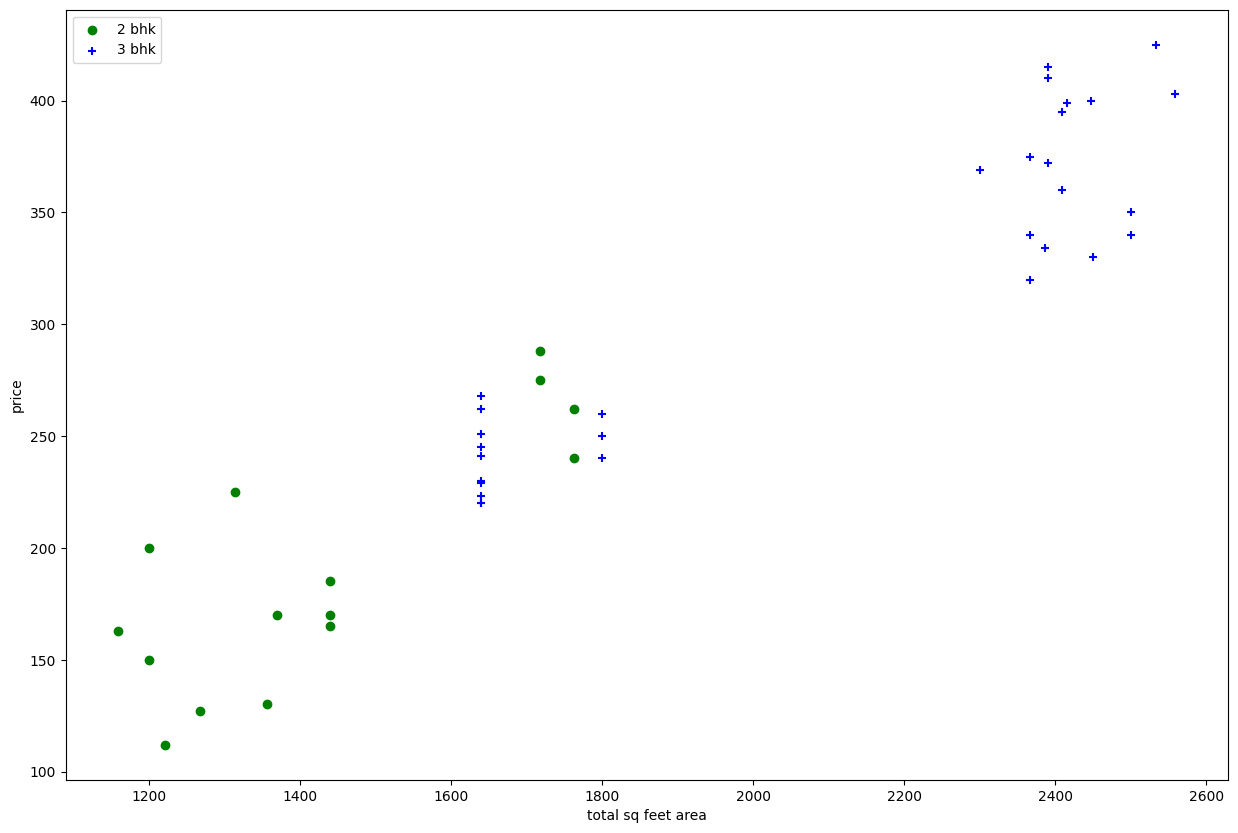

In [33]:
df4=remove_bhk_outliers(df3)
plot_function(df4,'Rajaji Nagar')


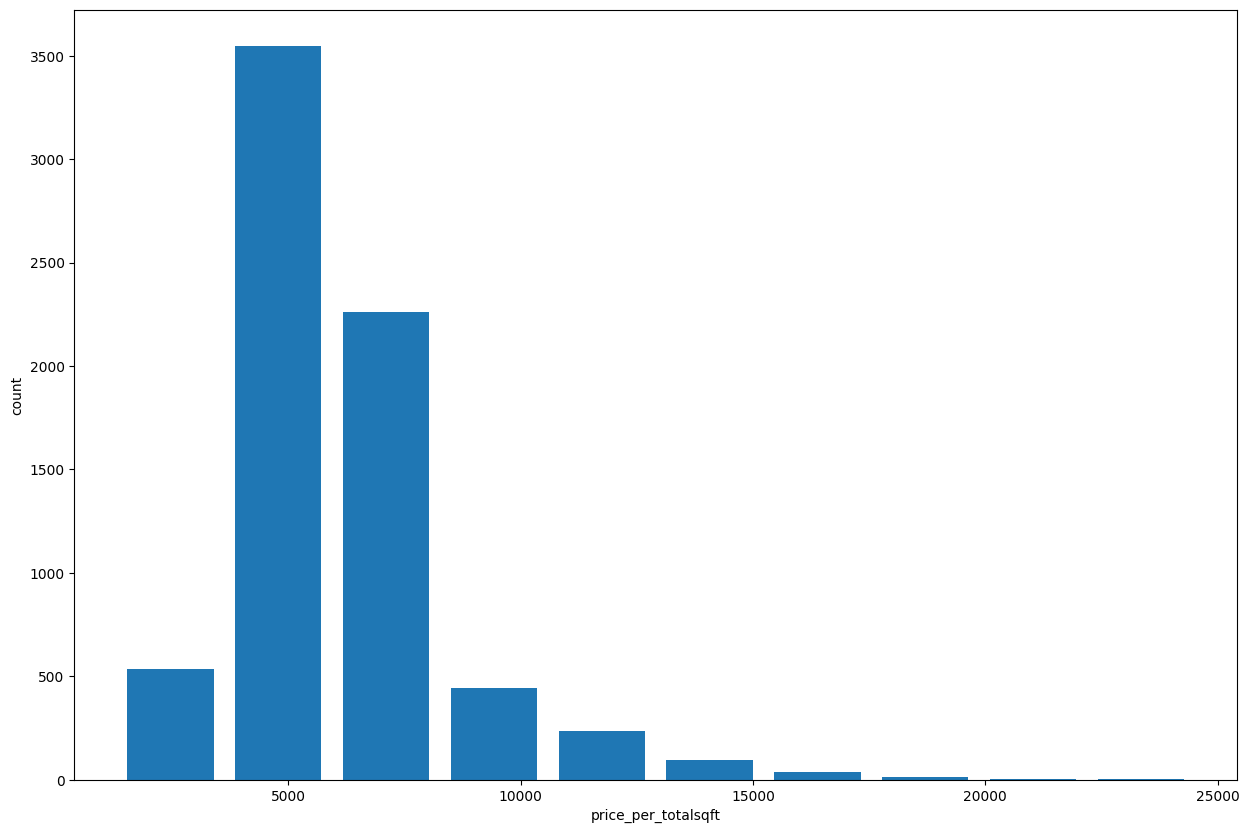

In [34]:
plt.figure(figsize=(15,10))
plt.hist(df4.price_per_totalsqft,rwidth=0.8)
plt.xlabel('price_per_totalsqft')
plt.ylabel('count')
plt.show()

In [35]:
#there are cases in which no of bathrooms are greter than no of bedrroms which i sinconveninet
df5=df4[df4['bath']<df4['bath']+2]
df5.shape

(7176, 7)

In [36]:
#lets do hot encoding on ocations
dummies=pd.get_dummies(df5['location'])
dummies=dummies.astype('int')
dummies.head(3)
#it is better to remove one column form encode part
df6=pd.concat([df5,dummies.drop('other',axis=1)],axis=1)
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_totalsqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df7=df6.drop(['size','location','price_per_totalsqft'],axis=1)
df7.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
x=df7.drop('price',axis=1)
y=df7['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [39]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
score1=reg.score(x_train,y_train)
score1

0.8615003831147218

#lets try kfold method as well as gridsearch cv fro improving


In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=6,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84372095, 0.80834024, 0.85139335, 0.87323358, 0.81089503,
       0.82212178])

In [41]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1

    return reg.predict([z])[0]

In [42]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\athar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.91840425538135

In [43]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\athar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


188.74230553616053

In [44]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(reg,f)

In [45]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))